<a href="https://colab.research.google.com/github/prabishkhadka/7316/blob/main/Real_Raster_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doing image stuff with Python like you do in ERDAS
***

## 0. There are a few preliminary steps first. We need data, for example. We will assume your data is on your Google Drive.
***
***
### 0.1 Mounting your Google Drive
***
* Run the following command to import __drive__ from __google.colab__.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0.2 Now you need to be familiar with some Linux shell commands
***
* __ls__ (that's a lowercase L) will list the contents of your directory
* __pwd__ will list your present working directory
* __cd ```<directory>```__ will change directory to the ```<directory>``` you list
* __cd ..__ will change up one directory in the hierarchical tree of directories
* __mkdir <new_directory>__ will make a new directory in your _pwd_

##### Let's try these out now.

**What is your present working directory?**

In [5]:
!ls
# !pwd

drive  sample_data


**List the content of your /content/drive directory (aka folder).**

In [ ]:
ls


drive/  sample_data/


**Change into the MyDrive directory and list its contents.**

In [6]:
cd drive/MyDrive

/content/drive/MyDrive


In [9]:
ls

chelan/


**Navigate to your data folder on your Google Drive**

In [8]:
cd 7316/chelan/

[Errno 2] No such file or directory: '7316/chelan/'
/content/drive/MyDrive/7316/chelan


**List the contents of this directory. Ah! Real raster image data. Landsat 8 to be precise.**

In [10]:
ls

chelan/


In [11]:
cd chelan

/content/drive/MyDrive/7316/chelan/chelan


### 0.3 We now need to prepare Google Colab to use some of the packages/modules we need to do our work.
***

This page you are working on is a Jupyter Notebook. One way you can tell is that the file ends in an .ipynb extension. (ipynb is for IPython Notebook and Jupyter used to be called IPython.) Besides, this is what a Jupyter Notebook looks like...cells with text and code where each line can be executed separately from the other lines of code.

We are running Python in the Jupyter Notebook and Python uses a program called pip to install its packages. We'll do the same here. Let's install the rasterio package.

In [12]:
!pip install rasterio

You can see that rasterio was installed...and so were other packages on which rasterio depends. We get it all using the !pip command.

## 1.0 Using Rasterio
***
***
### 1.1 Reading image data and associated attributes
***

In [13]:
import rasterio as r

In [14]:
rast = r.open('LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff')

In [15]:
print(type(rast))

<class 'rasterio.io.DatasetReader'>


In [16]:
print(dir(r.io.DatasetReader))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_block_shapes', '_count', '_crs', '_crs_wkt', '_descriptions', '_dtypes', '_env', '_gcps', '_get_crs', '_get_rpcs', '_handle_crswkt', '_has_band', '_has_gcps_or_rpcs', '_mask_flags', '_nodatavals', '_offsets', '_read', '_rpcs', '_scales', '_set_all_descriptions', '_set_all_offsets', '_set_all_scales', '_set_all_units', '_set_attrs_from_dataset_handle', '_set_crs', '_set_gcps', '_set_nodatavals', '_set_rpcs', '_transform', '_units', 'block_shapes', 'block_size', 'block_window', 'block_windows', 'bounds', 'checksum', 'close', 'closed', 'colorinterp', 'colormap', 'compression

In [17]:
print(f"The number of rows is {rast.height} and the number of columns is {rast.width}")

The number of rows is 7801 and the number of columns is 7681


In [18]:
print(f"The number of bands is {rast.count}")

The number of bands is 1


In [19]:
rast.shape

(7801, 7681)

In [22]:
rast.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]')

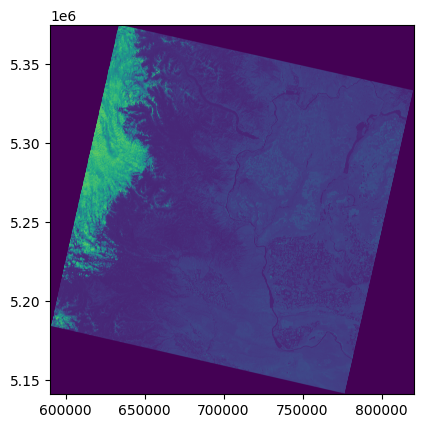

<Axes: >

In [23]:
from rasterio.plot import show, show_hist
show(rast)

In [25]:
rast.res

(30.0, 30.0)

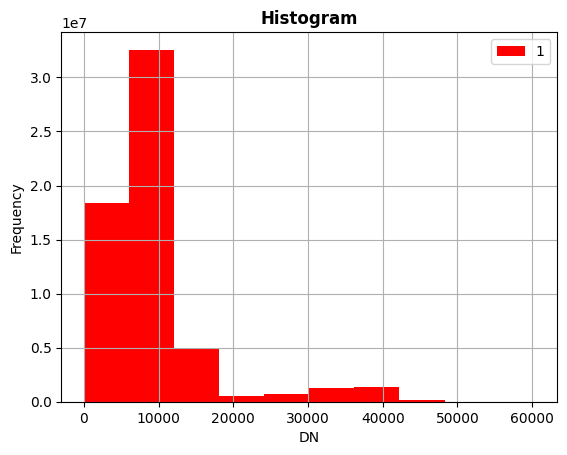

In [24]:
show_hist(rast)

In [26]:
rast.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

In [27]:
b4 = rast.read()

In [28]:
print(type(b4))

<class 'numpy.ndarray'>


In [29]:
print(b4.shape)

(1, 7801, 7681)


In [30]:
b4[0,5000,5000]

np.uint16(11000)

In [31]:
rast.transform

Affine(30.0, 0.0, 590385.0,
       0.0, -30.0, 5375115.0)

### 1.2 Writing raster data
***
We will write (aka save) the data we opened and read previously to a new file with a different format (from GTiff to HFA).

In [32]:
dst_meta = rast.meta

In [33]:
dst_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

In [34]:
dst_meta.update(driver = 'HFA')

In [35]:
dst_meta

{'driver': 'HFA',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

In [36]:
dst = r.open('b4.img', 'w', **dst_meta)

In [37]:
type(dst)

rasterio.io.DatasetWriter

In [38]:
dst.write(b4)

In [39]:
newfile = r.open('b4.img')

/usr/local/lib/python3.12/dist-packages/rasterio/__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, thread_safe=thread_safe, **kwargs)


In [40]:
newfile.meta

{'driver': 'HFA',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 1,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [41]:
newfile_array = newfile.read()

In [42]:
dst.close()

In [43]:
ls

b4.img
classified.gpkg
contrast_texture.tif
cropCircles.tif
decision_tree.png
LC08_L1TP_045027_20210702_20210713_01_T1_ANG.txt
LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B11.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B2.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B3.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B5.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B6.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B7.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B8.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B9.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_BQA.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.json
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.txt
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_large.jpg
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_small.jpg
pruned_decision_tree.png
ready2classify.gpkg
reproj.tif
rgb_felz_segm

## 2.0 Stacking image bands
***
**We will create a 3-band (RGB) multi-band stacked image from 3 individual tif files.**

In [44]:
file_list = ['LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff',
             'LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff',
             'LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff']
file_list

['LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff',
 'LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff',
 'LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff']

In [46]:
# Read metadata of first file
with r.open(file_list[0]) as src0:
    meta = src0.meta

In [47]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

In [48]:
# Update meta to reflect the number of layers
meta.update(count = len(file_list))

In [49]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 3,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

In [52]:
# Read each layer and write it to stack
with r.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with r.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [53]:
ls

b4.img
classified.gpkg
contrast_texture.tif
cropCircles.tif
decision_tree.png
LC08_L1TP_045027_20210702_20210713_01_T1_ANG.txt
LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B11.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B2.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B3.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B5.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B6.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B7.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B8.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B9.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_BQA.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.json
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.txt
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_large.jpg
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_small.jpg
pruned_decision_tree.png
ready2classify.gpkg
reproj.tif
rgb_felz_segm

In [54]:
stack = r.open("stack.tif")
print(type(stack))

<class 'rasterio.io.DatasetReader'>


In [56]:
print(stack.count)
print(stack.height)
print(stack.width)

3
7801
7681


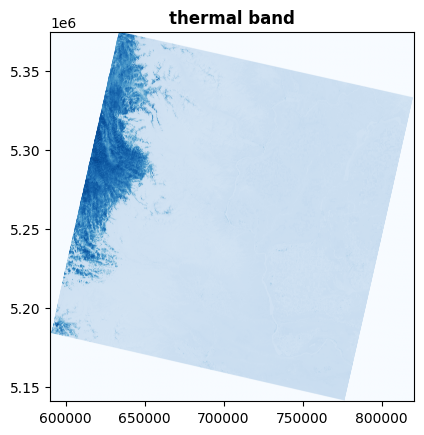

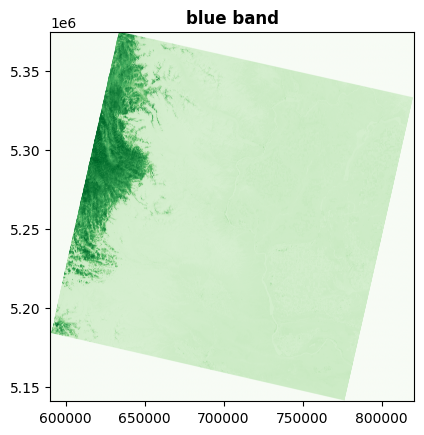

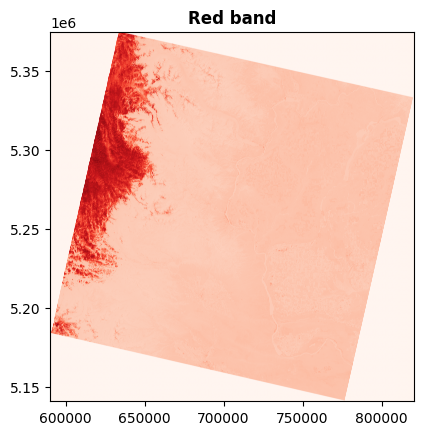

<Axes: title={'center': 'Red band'}>

In [57]:
show((stack, 1), cmap='Blues', title='thermal band')
show((stack, 1), cmap='Greens', title='blue band')
show((stack, 1), cmap='Reds', title='Red band')

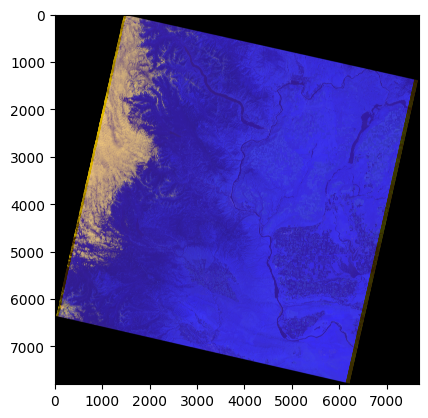

<Axes: >

In [58]:
whole = stack.read()
show((whole - whole.min()) / (whole.max() - whole.min()))

In [59]:
whole[1, 5000, 2000]

np.uint16(8994)

## 3.0 Clipping an image
***
### 3.1 First, we need a little aside about row/column and x/y coordinates
***

* The code below shows us the bounding box for the entire image

In [60]:
stack.bounds

BoundingBox(left=590385.0, bottom=5141085.0, right=820815.0, top=5375115.0)

* This code below shows us the affine transform used to convert back and forth between row/column coordinates and x/y coordinates.
* See [here](https://rasterio.readthedocs.io/en/latest/topics/migrating-to-v1.html?highlight=affine) and [here](https://www.perrygeo.com/python-affine-transforms.html) for further information about affine transformations.

In [61]:
stack.transform

Affine(30.0, 0.0, 590385.0,
       0.0, -30.0, 5375115.0)

In [62]:
print(stack.width)
print(stack.height)

7681
7801


* Multiplying an images affine transform by a row/column coordinate pair yields an x/y coordinate pair.

In [63]:
stack.transform * (3000, 3000)

(680385.0, 5285115.0)

* Alternatively, you can use rasterio in a slightly different way to do the same thing.

In [ ]:
r.transform.xy(stack.transform, 3000, 3000)

* And then you can do it back again using rasterio's r.transform.rowcol to convert x/y coordinates to row/col coordinates.
* And look, they match!

In [64]:
r.transform.rowcol(stack.transform, 680400.0, 5285100.0)

(np.int32(3000), np.int32(3000))

### 3.1 Clipping using x/y image coordinates
***
**The x/y coordinates shown below are for an Area of Interest (AOI) in our image scene. It is the area we want to clip from the image.** Feel free to use a different AOI.

x1/y1 is the upper-left coordinate of the AOI. x2/y2 is the lower-right coordinate of the AOI.

In [66]:
# x1 = 706041
# y1 = 5314251
# x2 = 720677
# y2 = 5300404

## Really small area
# x1 = 711882
# y1 = 5306769
# x2 = 712738
# y2 = 5305869

## Larger area
x1 = 725060
y1 = 5231848
x2 = 752214
y2 = 5216695

**The truth is, we don't really clip with x/y coordinates. We must clip with row/col coordinates. So...convert from x/y to row/col, as shown below.**

In [68]:
ul = r.transform.rowcol(stack.transform, x1, y1)
lr = r.transform.rowcol(stack.transform, x2, y2)

In [69]:
print(type(ul))
print(ul)
print(lr)

<class 'tuple'>
(np.int32(4775), np.int32(4489))
(np.int32(5280), np.int32(5394))


In [70]:
print(f"The first element of the tuple is: {ul[0]} (this is the row) and the second element is: {ul[1]} (this is the column)")

The first element of the tuple is: 4775 (this is the row) and the second element is: 4489 (this is the column)


In [72]:
print(f"The upper left row/col coordinates are {ul}")
print(f"The lower right row/col coordinates are {lr}")

The upper left row/col coordinates are (np.int32(4775), np.int32(4489))
The lower right row/col coordinates are (np.int32(5280), np.int32(5394))


Previously we only ever used rasterio's read function without parameters. Now we will use a parameter...window. ```window``` is the bounding box of the area we want to clip and it has to be in row/column coordinates.

In [73]:
subset = stack.read(window=((ul[0], lr[0]), (ul[1],lr[1])))

In [74]:
subset[0, 0, 0]

np.uint16(11356)

In [75]:
subset[0, 0, 1]

np.uint16(11323)

In [76]:
subset.shape

(3, 505, 905)

In [77]:
type(subset)

numpy.ndarray

In [78]:
subset

array([[[11356, 11323, 11373, ..., 11276, 10375, 10512],
        [11328, 11371, 11311, ..., 11475, 10656, 10435],
        [11376, 11323, 11292, ..., 11104, 11125, 11166],
        ...,
        [ 9636,  9656,  9637, ..., 10953, 10926, 11008],
        [ 9635,  9657,  9659, ..., 10991, 11002, 11018],
        [ 9638,  9644,  9674, ..., 11057, 11026, 10990]],

       [[11696, 11436, 11671, ...,  9981,  8631,  9950],
        [11633, 11627, 11473, ...,  9697,  9004,  8913],
        [11996, 11560, 11494, ..., 11163, 10994, 11046],
        ...,
        [ 6271,  6288,  6296, ..., 10225, 10269, 10300],
        [ 6278,  6290,  6307, ..., 10338, 10435, 10404],
        [ 6276,  6273,  6281, ..., 10480, 10380, 10294]],

       [[40365, 40333, 40313, ..., 34334, 34472, 34503],
        [40368, 40334, 40311, ..., 34274, 34427, 34493],
        [40371, 40331, 40308, ..., 34009, 34115, 34138],
        ...,
        [25984, 25950, 25950, ..., 38854, 38887, 38907],
        [25975, 25946, 25968, ..., 38782, 388

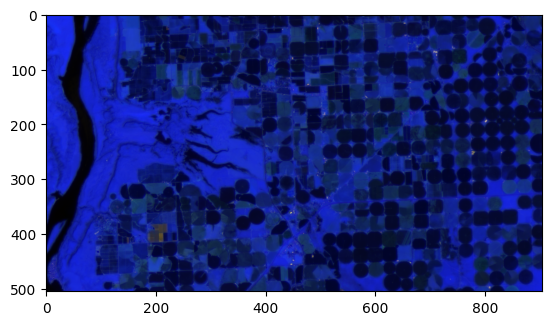

<Axes: >

In [79]:
show((subset - subset.min()) / (subset.max() - subset.min()))

#### Let's write this clipped image to a new file.
(Note that you can analyze the numpy array without ever writing it to disk. With a desktop software like ERDAS we are used to creating new files for every operation we run: clipping, stacking, processing, etc. You don't really need to do that when you are manipulating the code like this. This can be more efficient. When you need to, however, you can save to a new file.)


Below is the original meta dictionary. We must modify it to match our current numpy characteristics.

In [80]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7801,
 'count': 3,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 590385.0,
        0.0, -30.0, 5375115.0)}

Everything is the same except for the number of rows and columns AND the transform--the coordinates of the transform are different.

In [81]:
print(subset.shape)
print(subset.dtype)

(3, 505, 905)
uint16


In [82]:
dst_meta = meta

In [83]:
dst_meta.update(height=subset.shape[1])
dst_meta.update(width=subset.shape[2])

In [84]:
from affine import Affine
t = Affine.translation(x1, y1) * Affine.scale(30, -30)
t

Affine(30.0, 0.0, 725060.0,
       0.0, -30.0, 5231848.0)

In [85]:
dst_meta.update(transform = t)

In [86]:
dst_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 905,
 'height': 505,
 'count': 3,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'),
 'transform': Affine(30.0, 0.0, 725060.0,
        0.0, -30.0, 5231848.0)}

In [88]:
dst = r.open('subset.tif', 'w', **dst_meta)
dst.write(subset)
dst.close()

In [89]:
ls

b4.img
classified.gpkg
contrast_texture.tif
cropCircles.tif
decision_tree.png
LC08_L1TP_045027_20210702_20210713_01_T1_ANG.txt
LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B11.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B2.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B3.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B5.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B6.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B7.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B8.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B9.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_BQA.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.json
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.txt
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_large.jpg
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_small.jpg
pruned_decision_tree.png
ready2classify.gpkg
reproj.tif
rgb_felz_segm

## 4.0 Reprojecting an image
***

In [90]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

* First we determine the EPSG code for the new projection. Below we use 4326 which is WGS lon/lat.

In [92]:
reproj_crs = 'EPSG:4326' # 'EPSG:3857'

In [93]:
stack.bounds

BoundingBox(left=590385.0, bottom=5141085.0, right=820815.0, top=5375115.0)

* Second we use ```calculate_default_transform``` to determine the transform, height and width of the new projection.

In [94]:
# dst_meta is the meta for the clipped image. Don't get confused and think it is for this reprojected image.
dst_transform, dst_width, dst_height = calculate_default_transform(dst_meta['crs'],
                                                                   reproj_crs, dst_meta['width'],
                                                                   dst_meta['height'],
                                                                   left=x1,
                                                                   bottom=y2,
                                                                   right=x2,
                                                                   top=y1)

In [95]:
print(dst_transform)
print(dst_height)
print(dst_width)

| 0.00, 0.00,-120.04|
| 0.00,-0.00, 47.20|
| 0.00, 0.00, 1.00|
399
1000


In [96]:
print("The x and y resolutions aren't really 0, they are " + str(dst_transform.a) + " and " + str(dst_transform.e) + ", respectively")

The x and y resolutions aren't really 0, they are 0.00036542843861996 and -0.00036542843861996, respectively


In [97]:
reproj_meta = dst_meta.copy()

In [98]:
reproj_meta.update({
    'crs': reproj_crs,
    'transform': dst_transform,
    'width': dst_width,
    'height': dst_height})

In [99]:
reproj_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1000,
 'height': 399,
 'count': 3,
 'crs': 'EPSG:4326',
 'transform': Affine(0.00036542843861996, 0.0, -120.03596829313078,
        0.0, -0.00036542843861996, 47.20156561916156)}

In [100]:
dst = r.open('reproj.tif', 'w', **reproj_meta)
dst.write(subset)
dst.close()

In [101]:
ls

b4.img
classified.gpkg
contrast_texture.tif
cropCircles.tif
decision_tree.png
LC08_L1TP_045027_20210702_20210713_01_T1_ANG.txt
LC08_L1TP_045027_20210702_20210713_01_T1_B10.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B11.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B1.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B2.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B3.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B4.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B5.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B6.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B7.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B8.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_B9.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_BQA.tiff
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.json
LC08_L1TP_045027_20210702_20210713_01_T1_MTL.txt
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_large.jpg
LC08_L1TP_045027_20210702_20210713_01_T1_thumb_small.jpg
pruned_decision_tree.png
ready2classify.gpkg
reproj.tif
rgb_felz_segm

Support for third party widgets will remain active for the duration of the session. To disable support: